Importing required libraries. Here, cv2 library is used to just read image and convert into gray scale.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

1) Loading, priniting dimensions, and displaying our target image, and patch images from the drive.

In [2]:
imgInterest=cv2.imread("Images/animals_patch.png")
imgPatch1=cv2.imread("Images/animals_patch.png")
imgPatch2=cv2.imread("Images/patch_2.png")
imgShapes1=cv2.imread("Images/animals.png")
imgShapes2=cv2.imread("Images/shapes_2.png")
imgAnimalPatch=cv2.imread("Images/animals_patch.png")
imgAnimal=cv2.imread("Images/animals.png")

In [3]:
imgGrayInterest = cv2.cvtColor(imgInterest, cv2.COLOR_BGR2GRAY)
imgGrayPatch1 = cv2.cvtColor(imgPatch1, cv2.COLOR_BGR2GRAY)
imgGrayPatch2 = cv2.cvtColor(imgPatch2, cv2.COLOR_BGR2GRAY)
imgGrayShapes1 = cv2.cvtColor(imgShapes1, cv2.COLOR_BGR2GRAY)
imgGrayShapes2 = cv2.cvtColor(imgShapes2, cv2.COLOR_BGR2GRAY)
imgGrayAnimalPatch=cv2.cvtColor(imgAnimalPatch, cv2.COLOR_BGR2GRAY)
imgGrayAnimal=cv2.cvtColor(imgAnimal, cv2.COLOR_BGR2GRAY)

(320, 370, 3)
(270, 240, 3)
(270, 240, 3)
(750, 1200, 3)
(780, 1096, 3)


<Figure size 432x288 with 0 Axes>

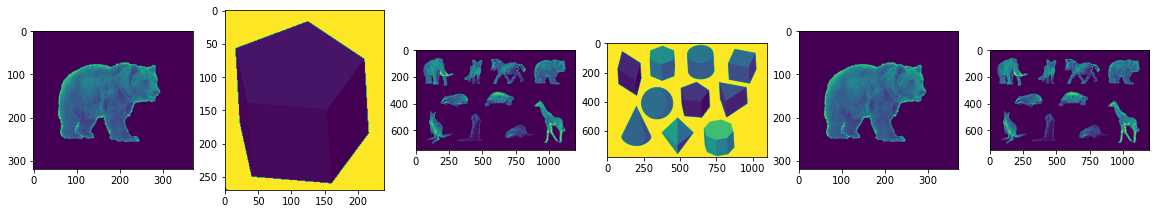

In [4]:
print(imgPatch1.shape)
print(imgPatch2.shape)
print(imgPatch2.shape)
print(imgShapes1.shape)
print(imgShapes2.shape)
plt.figure()
fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1, 6, 1)
plt.imshow(imgGrayPatch1)
fig.add_subplot(1, 6, 2)
plt.imshow(imgGrayPatch2)
fig.add_subplot(1, 6, 3)
plt.imshow(imgGrayShapes1)
fig.add_subplot(1, 6, 4)
plt.imshow(imgGrayShapes2)
fig.add_subplot(1, 6, 5)
plt.imshow(imgGrayAnimalPatch)
fig.add_subplot(1, 6, 6)
plt.imshow(imgGrayAnimal)
plt.show()

In [5]:
sigma=0.5
T=0.3

In [6]:
def findFilterXYDerivative(filter_size, sigma):
    sHalf = round((-2*math.log(T)*(sigma**2))**(1/2))
    print(sHalf)
    N= 2*sHalf+1
    return np.meshgrid (np.linspace(-sHalf, sHalf, N), np.linspace(-sHalf , sHalf,N))

def findFlip2D(imgFilt):
    output=np.zeros([imgFilt.shape[0],imgFilt.shape[1]])
    for y in range(0,imgFilt.shape[0]):
        for x in range(0,imgFilt.shape[1]):
            output[y,x]=imgFilt[imgFilt.shape[0]-y-1,imgFilt.shape[1]-x-1]
    return output

def findGaussian(N, sigma):
    x, y = np.mgrid[-N//2 + 1:N//2 + 1, -N//2 + 1:N//2 + 1]
    g = np.exp(-((x**2 + y**2)/(2.0*sigma**2)))
    return g/g.sum()

def findDotProduct(imgFilt,imgPatch):
    if(imgFilt.shape==imgPatch.shape):
        return sum(sum(imgFilt*imgPatch))
    else:
        print("Dimensions of given inputs do not match.")
        print(imgFilt.shape)
        print(imgPatch.shape)
        return
    
def findConvolution2D(imgFiltr,imgTarget):
    
    if (imgTarget.shape[0]-imgFiltr.shape[0]>-1)and(imgTarget.shape[1]-imgFiltr.shape[1]>-1):
        imgFilt=findFlip2D(imgFiltr)
        output=np.zeros([imgTarget.shape[0]+imgFilt.shape[0]-1,imgTarget.shape[1]+imgFilt.shape[1]-1])
        temp=np.zeros([imgTarget.shape[0]+2*imgFilt.shape[0]-2,imgTarget.shape[1]+2*imgFilt.shape[1]-2])
        temp[imgFilt.shape[0]-1:imgTarget.shape[0]+imgFilt.shape[0]-1,imgFilt.shape[1]-1:imgTarget.shape[1]+imgFilt.shape[1]-1]=imgTarget
        for y in range(0,output.shape[0]):
            for x in range(0,output.shape[1]):
                output[y,x]=findDotProduct(imgFilt,temp[y:y+imgFilt.shape[0],x:x+imgFilt.shape[1]])
        return output
    else:
        print("Target image dimension is less than the target image dimension")
        return
    
def findConvolution2Dfixed(imgFiltr,imgTarget):
    
    if (imgTarget.shape[0]-imgFiltr.shape[0]>-1)and(imgTarget.shape[1]-imgFiltr.shape[1]>-1):
        imgFilt=findFlip2D(imgFiltr)
        output=np.zeros([imgTarget.shape[0]+imgFilt.shape[0]-1,imgTarget.shape[1]+imgFilt.shape[1]-1])
        temp=np.zeros([imgTarget.shape[0]+2*imgFilt.shape[0]-2,imgTarget.shape[1]+2*imgFilt.shape[1]-2])
        temp[imgFilt.shape[0]-1:imgTarget.shape[0]+imgFilt.shape[0]-1,imgFilt.shape[1]-1:imgTarget.shape[1]+imgFilt.shape[1]-1]=imgTarget
        for y in range(0,output.shape[0]):
            for x in range(0,output.shape[1]):
                output[y,x]=findDotProduct(imgFilt,temp[y:y+imgFilt.shape[0],x:x+imgFilt.shape[1]])
        return output[imgFilt.shape[0]:output.shape[0]-imgFilt.shape[0]+1,imgFilt.shape[1]:output.shape[1]-imgFilt.shape[1]+1]
    else:
        print("Target image dimension is less than the target image dimension")
        return
    
def findGradientMagnitude(imgGrayCircleXDerivative,imgGrayCircleYDerivative):
    return ((imgGrayCircleXDerivative**2+imgGrayCircleYDerivative**2)**(1/2))

In [7]:
[fx,fy]=findFilterXYDerivative (T, sigma)

1


In [8]:
G=findGaussian(3,sigma)

In [9]:
Gx=findConvolution2D(G,fx)
Gy=findConvolution2D(G,fy)

In [10]:
imgGrayCircleXDerivative = findConvolution2Dfixed(Gx,imgGrayInterest)
imgGrayCircleYDerivative = findConvolution2Dfixed(Gy,imgGrayInterest)

In [11]:
imgGrayCircleXYDerivativeMagnitude=findGradientMagnitude(imgGrayCircleXDerivative,imgGrayCircleYDerivative)

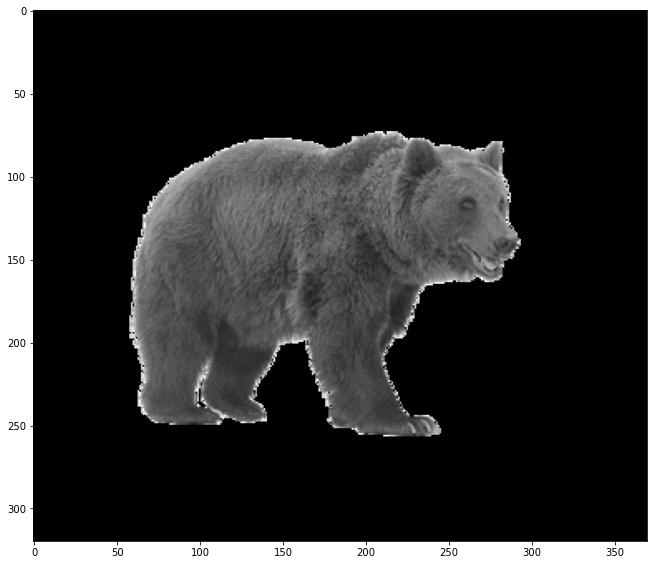

In [12]:
plt.figure(figsize=(11, 11))
plt.imshow(imgGrayInterest, cmap='gray')
plt.show()
plt.close() 

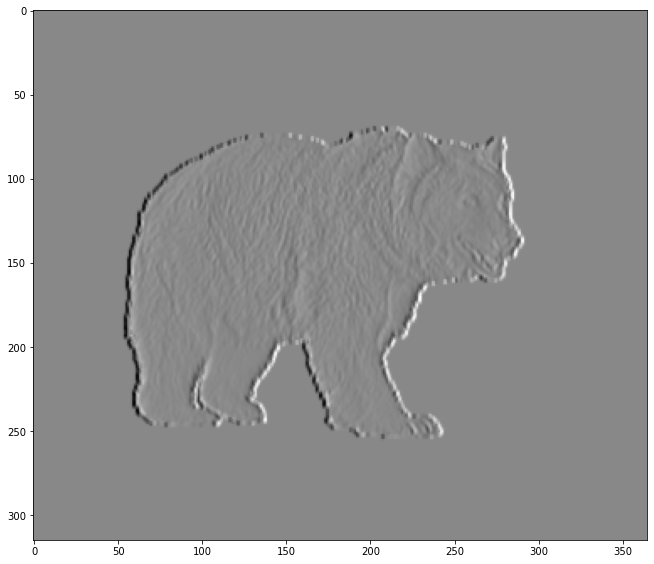

In [13]:
plt.figure(figsize=(11, 11))
plt.imshow(imgGrayCircleXDerivative, cmap='gray')
plt.show()
plt.close() 

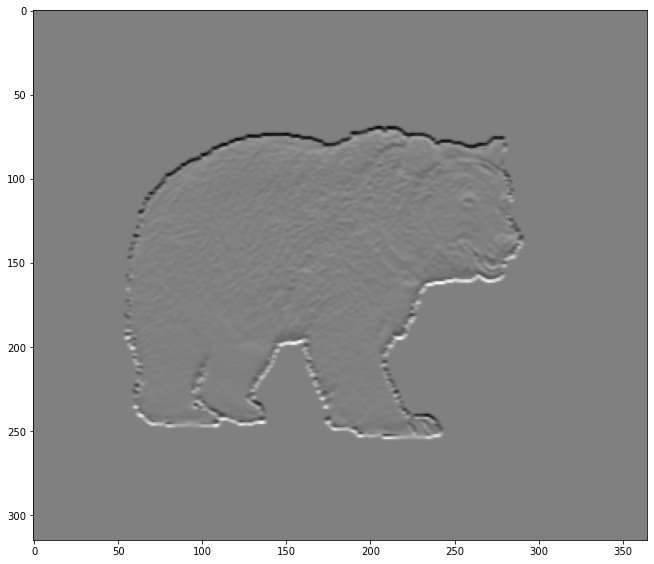

In [14]:
plt.figure(figsize=(11, 11))
plt.imshow(imgGrayCircleYDerivative, cmap='gray')
plt.show()
plt.close() 

In [15]:
def findMax2DIndex(resolution):
  location=[0,0]
  maxVal=resolution[0,0]
  for x in range(0,resolution.shape[0]):
    for y in range(0,resolution.shape[1]):
      if(resolution[x,y]>maxVal):
        maxVal=resolution[x,y]
        location=[x,y]
  return location

In [16]:
def findMin2DIndex(resolution):
  location=[0,0]
  minVal=resolution[0,0]
  for x in range(0,resolution.shape[0]):
    for y in range(0,resolution.shape[1]):
      if(resolution[x,y]<minVal):
        minVal=resolution[x,y]
        location=[x,y]
  return location

In [17]:
def findScaleDown0To255(resolution):
    [xMin,yMin]=findMin2DIndex(resolution)
    [xMax,yMax]=findMax2DIndex(resolution)
    return ((resolution-resolution[xMin,yMin])/(resolution[xMax,yMax]))*255

In [18]:
imgGrayCircleXYDerivativeMagnitudeScaledDownTo255=findScaleDown0To255(imgGrayCircleXYDerivativeMagnitude)


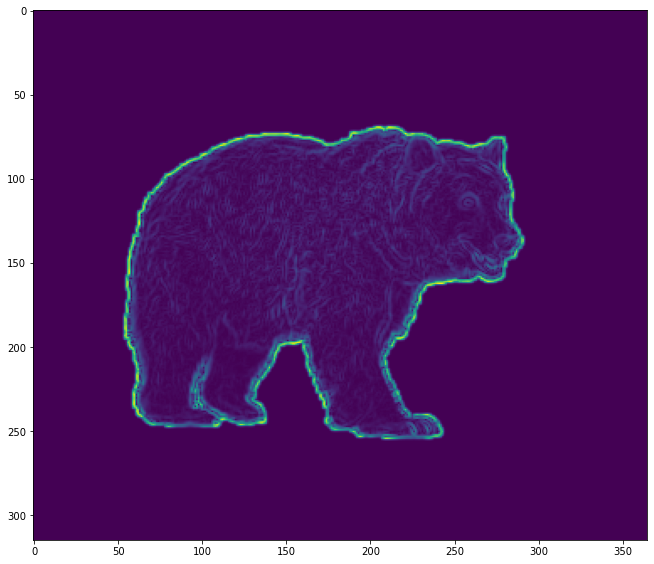

In [19]:
plt.figure(figsize=(11, 11))
plt.imshow(imgGrayCircleXYDerivativeMagnitudeScaledDownTo255)
plt.show()
plt.close() 

In [20]:
def findGradientDirection(imgGrayCircleXDerivative,imgGrayCircleYDerivative):
    return np.rad2deg(np.arctan2(imgGrayCircleYDerivative,imgGrayCircleXDerivative))

In [21]:
imgGrayCircleXYDerivativeDirection=findGradientDirection(imgGrayCircleXDerivative,imgGrayCircleYDerivative)

In [22]:
def findNonMaximumSuppression(imgResolutionDirection,imgGrayXYDerivativeMagnitude):
        imgResolutionDirectionNonMaximaSuppressed = np.zeros([imgGrayXYDerivativeMagnitude.shape[0],imgGrayXYDerivativeMagnitude.shape[1]])
        for y in range(1,imgResolutionDirection.shape[0]-1):
            for x in range(1,imgResolutionDirection.shape[1]-1):
                firstNeighbour=0
                secondNeighbour=0
                if (-22.5<=imgResolutionDirection[y,x]<22.5)or(157.5<=imgResolutionDirection[y,x]<180)or(-180<=imgResolutionDirection[y,x]<-157.5):
                    firstNeighbour=imgGrayXYDerivativeMagnitude[y,x-1]
                    secondNeighbour=imgGrayXYDerivativeMagnitude[y,x+1]
                elif (22.5<=imgResolutionDirection[y,x]<67.5)or(-157.5<=imgResolutionDirection[y,x]<=-112.5):
                    firstNeighbour=imgGrayXYDerivativeMagnitude[y+1,x+1]
                    secondNeighbour=imgGrayXYDerivativeMagnitude[y-1,x-1]
                elif (67.5<=imgResolutionDirection[y,x]<112.5)or(-112.5<=imgResolutionDirection[y,x]<=-67.5):
                    firstNeighbour=imgGrayXYDerivativeMagnitude[y+1,x]
                    secondNeighbour=imgGrayXYDerivativeMagnitude[y-1,x]
                elif (112.5<=imgResolutionDirection[y,x]<157.5)or(-67.5<=imgResolutionDirection[y,x]<=-22.5):
                    firstNeighbour=imgGrayXYDerivativeMagnitude[y+1,x-1]
                    secondNeighbour=imgGrayXYDerivativeMagnitude[y-1,x+1]
                if(imgGrayXYDerivativeMagnitude[y,x]>=firstNeighbour)and(imgGrayXYDerivativeMagnitude[y,x]>=secondNeighbour):
                    imgResolutionDirectionNonMaximaSuppressed[y,x]=imgGrayXYDerivativeMagnitude[y,x]
                else:
                    imgResolutionDirectionNonMaximaSuppressed[y,x]=0
        return imgResolutionDirectionNonMaximaSuppressed

In [23]:
imgGrayCircleXYDerivativeDirectionNMS=findNonMaximumSuppression(imgGrayCircleXYDerivativeDirection,imgGrayCircleXYDerivativeMagnitudeScaledDownTo255)

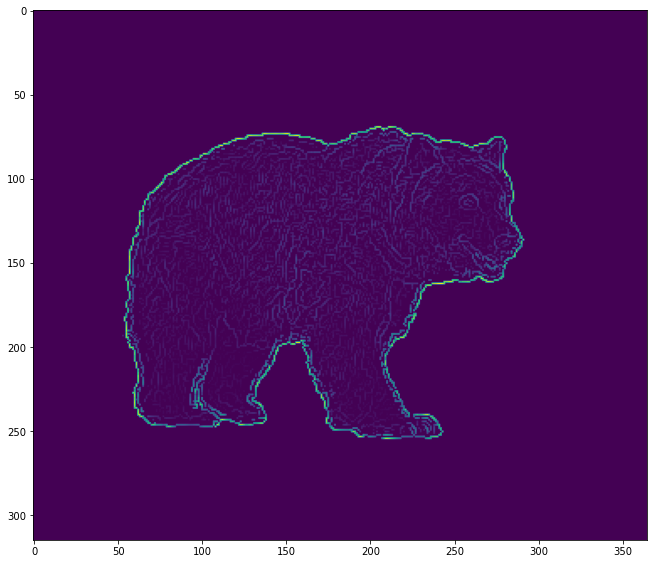

In [24]:
plt.figure(figsize=(11, 11))
plt.imshow(imgGrayCircleXYDerivativeDirectionNMS)
plt.show()
plt.close() 

In [25]:
def findHystereisThresholding(img,threholdHigh,thresholdLow):
    output=np.zeros(img.shape)
    for y in range(0,img.shape[0]):
        for x in range(0,img.shape[1]):
            if(img[y,x]<=thresholdLow):
                output[y,x]=0
            elif(img[y,x]>=threholdHigh):
                output[y,x]=255
            else:
                if(0<x<img.shape[1])and(0<y<img.shape[0]):
                    if(img[y-1:y+2,x-1:x+2].max()>=threholdHigh):
                        output[y,x]=255
                    else:
                        output[y,x]=0
                else:
                    output[y,x]=0
    return output

In [26]:
imgGrayCircleHysteresis=findHystereisThresholding(imgGrayCircleXYDerivativeDirectionNMS,70,40)

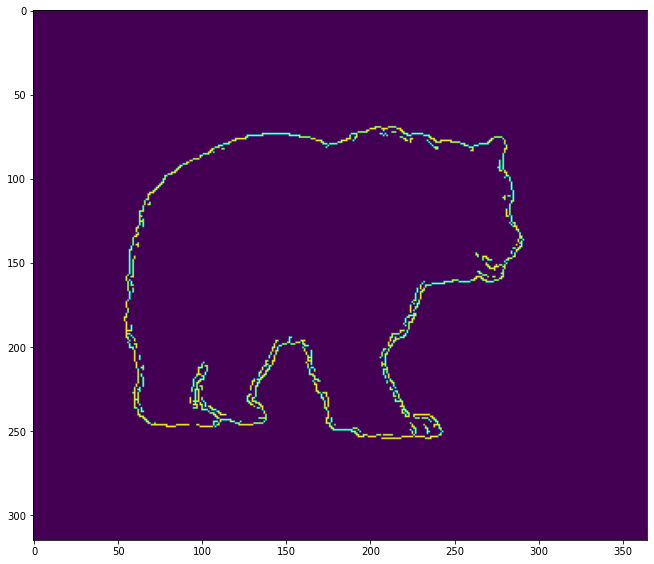

In [27]:
plt.figure(figsize=(11, 11))
plt.imshow(imgGrayCircleHysteresis)
plt.show()
plt.close() 